In [21]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


def train_and_score(data, num_of_pca_components=2):
    en = np.array(data["en"])
    ru = np.array(data["ru"])

    X = np.vstack([en.T, ru.T])
    y = np.array([1] * en.shape[1] + [0] * ru.shape[1])

    if num_of_pca_components < X.shape[1]:
        X = X[:, :num_of_pca_components]

    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=42)

    classifier = LogisticRegression(random_state=42, penalty="l2")

    classifier.fit(X_trn, y_trn)
    train_accuracy = classifier.score(X_trn, y_trn)
    test_accuracy = classifier.score(X_tst, y_tst)

    print(
        f"# of PCA components: {num_of_pca_components}, train accuracy {train_accuracy:.4f}, test accuracy {test_accuracy:.4f}"
    )

    if num_of_pca_components == 2:
        plt.figure(figsize=(10, 8))
        plot_decision_regions(
            X=X_trn,
            y=y_trn,
            clf=classifier,
            legend=2,
        )
        plt.title(f"Train, accuracy = {train_accuracy:.4f}")
        plt.show()

        plt.figure(figsize=(10, 8))
        plot_decision_regions(
            X=X_tst,
            y=y_tst,
            clf=classifier,
            legend=2,
        )
        plt.title(f"Test, accuracy = {test_accuracy:.4f}")
        plt.show()

In [22]:
import json

pca_projections_final_layer_qwen = None
with open("../../data/pca_projections_final_layer_qwen.json") as f:
    pca_projections_final_layer_qwen = json.load(f)

# of PCA components: 2, train accuracy 0.9977, test accuracy 0.9971


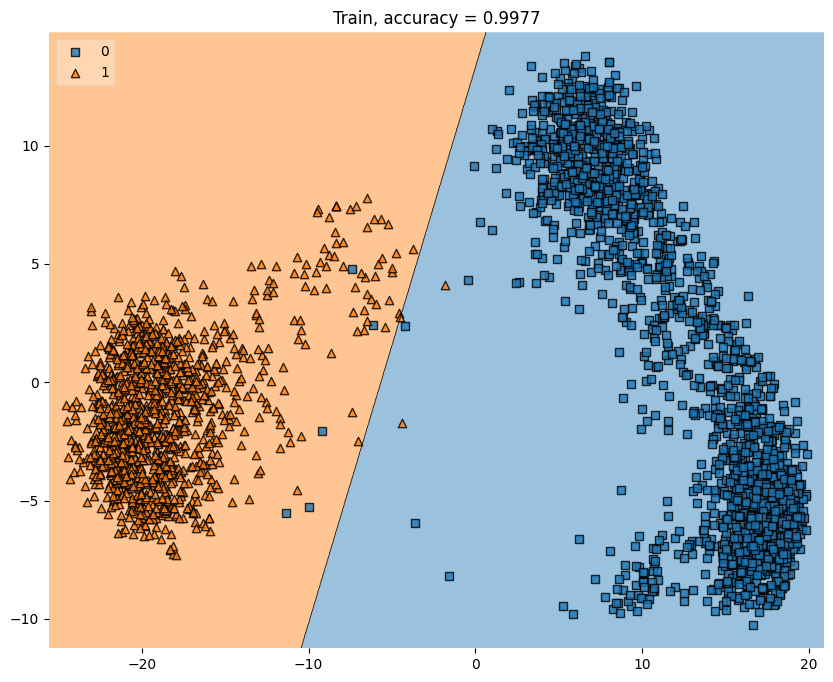

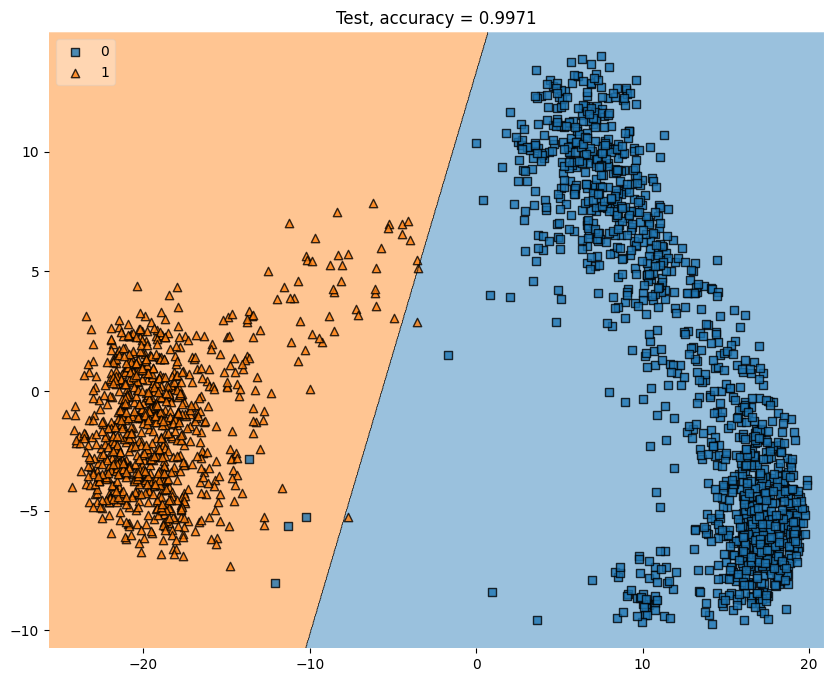

In [23]:
train_and_score(pca_projections_final_layer_qwen)

In [24]:
import json

pca_projections_mid_layer_qwen = None
with open("../../data/pca_projections_mid_layer_qwen.json") as f:
    pca_projections_mid_layer_qwen = json.load(f)

# of PCA components: 2, train accuracy 0.7517, test accuracy 0.7379


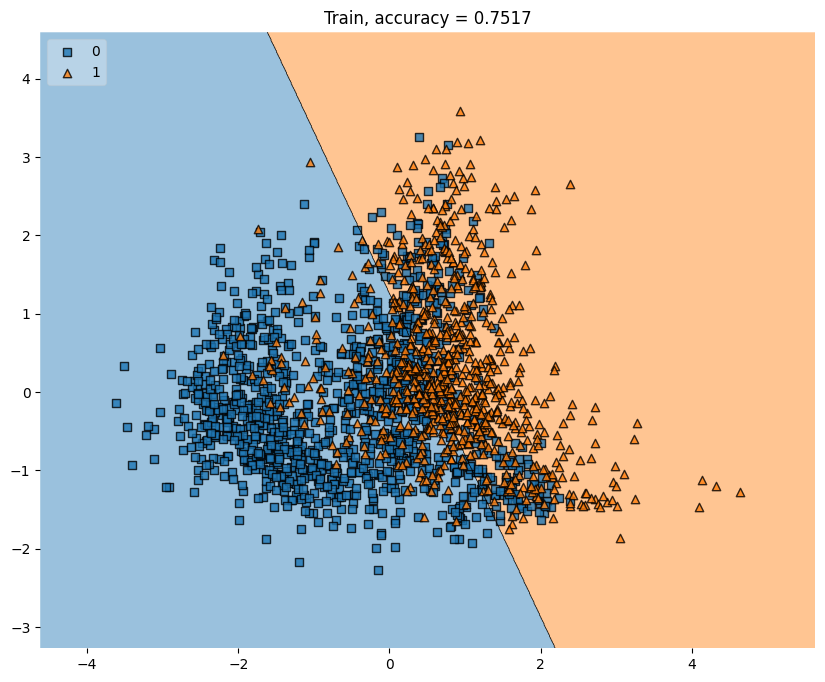

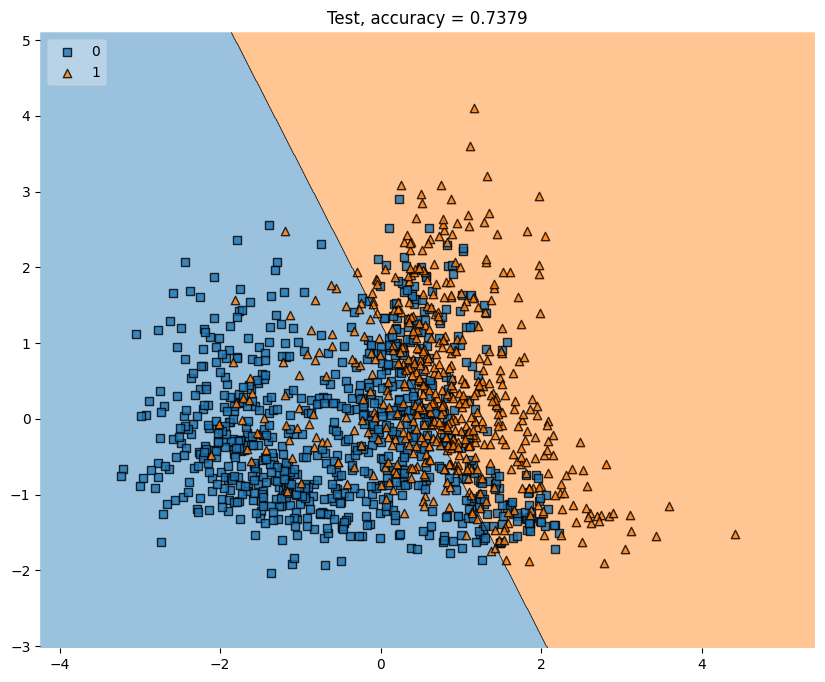

In [25]:
train_and_score(pca_projections_mid_layer_qwen)

In [26]:
train_and_score(pca_projections_mid_layer_qwen, num_of_pca_components=10)

# of PCA components: 10, train accuracy 0.9926, test accuracy 0.9933
